# Chromatic Effect

Again, using the paraxial approximation of the transverse Hamiltonian: 
\begin{equation}
K\left(x, p_x, y, p_y, z, \delta,s\right)=
-\left(1+\frac{x}{\rho}\right)\left(1+\delta-\frac{p_x^2}{2(1+\delta)}-\frac{p_y^2}{2(1+\delta)}\right)
-e\frac{A_s}{p_0}\left(1+\frac{x}{\rho}\right)
\end{equation}



If we keep only the quadratic terms which contains transverse coordinates $(x, p_x, y, p_y)$ while treating the energy deviation $\delta$ as a parameter, we get the energy dependent equation of motion and the definition of dispersion function.

\begin{align}
K\left(x, p_x, y, p_y, z, \delta,s\right)
&=
-\left(1+\frac{x}{\rho}\right)\left(1+\delta-\frac{p_x^2}{2(1+\delta)}-\frac{p_y^2}{2(1+\delta)}\right)
-e\frac{A_s}{p_0}\left(1+\frac{x}{\rho}\right)\\
&=\frac{p_x^2}{2(1+\delta)}+\frac{p_y^2}{2(1+\delta)}-\frac{x}{\rho}\delta + \frac{1}{2}K_x(s)x^2+\frac{1}{2}K_y(s)y^2
\end{align}

Where,
\begin{align}
K_x(s)&=\frac{1}{\rho^2}+k(s)\\
K_y(s)&=-k(s)
\end{align}

Then the equation of motion are simply:

\begin{align}
x''(s)+\frac{K_x(s)}{1+\delta}x(s)&=\frac{\delta}{1+\delta}\frac{1}{\rho}\\
y''(s)+\frac{K_y(s)}{1+\delta}y(s)&=0
\end{align}

## Chromaticity

The energy deviation of the particle can be effectly treated as the quadrupole error.  The effective quad error is 
\begin{align}
\Delta K_x&=-K_x \delta \\
\Delta K_y&=-K_y \delta
\end{align}

```{admonition} Example: particles passing through a quadrupole with energy spread
Here we can simulate the particle with near zero emittance, finite energy spread passing through a quadrupole (located at $s=0$)
```

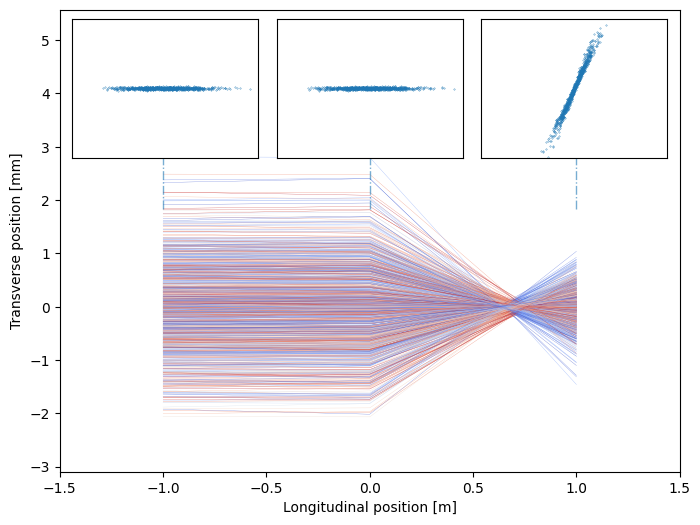

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
num_par=1000
xsize=0.8  # mm
pxsize=0.04 # mrad
coor=0
distance=1
focallen=-0.7
espread=0.1


step=2
dot_size_scale=np.log(2*num_par)**1.2
mod_xsize=xsize/np.sqrt(1+coor*coor)
beta=mod_xsize/pxsize
virtual_drift=coor*beta

espread_list=(np.random.rand(num_par)-0.5)*2*espread
emax=np.max(espread_list)
emin=np.min(espread_list)
colors=plt.cm.coolwarm((espread_list-emin)/(emax-emin)) 
particle_coor=np.zeros((3*step+3, num_par))
particle_coor[0, :]=np.random.randn(num_par)*mod_xsize
particle_coor[1, :]=np.random.randn(num_par)*pxsize
particle_coor[0, :]+=particle_coor[1, :]*virtual_drift
particle_coor[2, :]=np.zeros(num_par)-1.0

particle_coor[3, :]=particle_coor[0, :]+particle_coor[1, :]*distance
particle_coor[4, :]=particle_coor[1, :]
particle_coor[5, :]=particle_coor[2, :]+distance

particle_coor[7, :]=particle_coor[4, :]+particle_coor[3, :]/focallen/(1+espread_list)
particle_coor[6, :]=particle_coor[3, :]+particle_coor[7, :]*distance
particle_coor[8, :]=particle_coor[5,:]+distance

max_x=np.max([np.max(particle_coor[[0,3,6], :])*1.1, 3*xsize])
max_px=np.max([np.max(particle_coor[[1,4,7], :])*1.1, 3*pxsize])
fig,ax=plt.subplots(figsize=(8,6))
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-max_x,max_x*1.8)
for i in range(num_par):
    ax.plot(particle_coor[[2,5,8],i],particle_coor[[0,3,6],i], lw=2/dot_size_scale, color=colors[i],)
ax.axvline(x=1,ymin=2/2.6-0.2, ymax=2/2.6, linestyle='-.', lw=1, alpha=.6)
ax.axvline(x=0,ymin=2/2.6-0.2, ymax=2/2.6, linestyle='-.', lw=1, alpha=.6)
ax.axvline(x=-1,ymin=2/2.6-0.2, ymax=2/2.6, linestyle='-.', lw=1, alpha=.6)
ax.set_xlabel("Longitudinal position [m]")
ax.set_ylabel("Transverse position [mm]")
axins1 = ax.inset_axes([0.02, 0.68, 0.3, 0.3])
axins1.set_xlim([-max_x,max_x])
axins1.set_ylim([-max_px,max_px])
axins1.plot(particle_coor[0,:], particle_coor[1,:],ls='None',marker='.', ms=6/dot_size_scale)
axins1.set_xticks([])
axins1.set_yticks([])

axins2 = ax.inset_axes([0.35, 0.68, 0.3, 0.3])
axins2.plot(particle_coor[3,:], particle_coor[4,:],ls='None',marker='.', ms=6/dot_size_scale)
axins2.set_xlim([-max_x,max_x])
axins2.set_ylim([-max_px,max_px])
axins2.set_xticks([])
axins2.set_yticks([])

axins3 = ax.inset_axes([0.68, 0.68, 0.3, 0.3])
axins3.plot(particle_coor[6,:], particle_coor[7,:],ls='None',marker='.', ms=6/dot_size_scale)
axins3.set_xlim([-max_x,max_x])
axins3.set_ylim([-max_px,max_px])
axins3.set_xticks([])
axins3.set_yticks([])
plt.show()


The energy deviation of the particle can be effectly treated as the quadrupole error.  The effective quad error is 
\begin{align}
\Delta K_x&=-K_x \delta \\
\Delta K_y&=-K_y \delta
\end{align}

The tune change due to the energy deviation is given by:
\begin{align}
\Delta \nu_x&=\frac{1}{4\pi}\oint \beta_x \Delta K_x ds=\left(-\frac{1}{4\pi}\oint\beta_x K_xds\right) \delta \\
\Delta \nu_y&=\frac{1}{4\pi}\oint \beta_y \Delta K_y ds=\left(-\frac{1}{4\pi}\oint\beta_y K_yds\right) \delta
\end{align}

The quantities in the above parenthesis is defined as ***chromaticity*** $\xi_{x/y}$.

\begin{align}
\xi_{x/y}=-\frac{1}{4\pi}\oint\beta_{x/y} K_{x/y}ds\\
\end{align}

We see that chromaticity can be raised solely by linear lattice. This chromaticity is named ***natural chromaticity***. We can derive that for FODO cell, the natural chromaticity can be approximated by its transverse tune.

Since the chromaticity denotes the tune change due to the energy/momentum deviation, for simple calculations, one can write the one-turn transfer map for the particle with energy/momentum deviation $\delta$.

\begin{align}
\left(\begin{array}{cc}
\cos2\pi\left(\nu+\xi\delta\right)+\alpha\sin2\pi\left(\nu+\xi\delta\right) & \beta\sin2\pi\left(\nu+\xi\delta\right)\\
-\gamma\sin2\pi\left(\nu+\xi\delta\right) & \cos2\pi\left(\nu+\xi\delta\right)-\alpha\sin2\pi\left(\nu+\xi\delta\right)
\end{array}\right)
\end{align}

```{note}
In such treatment, the energy deviation must be treated as a parameter for the symplecticity of the transverse plane.  
```


### Chromaticity Measurement

Similar to the dispersion measurement in ring ({eq}`eq:dispersion:measurement_ring`), the chromaticity measurement needs monitoring the tune shift with the adjustment of the RF frequency, i.e.

\begin{equation}
\xi_{x/y} = \frac{d \nu_{x/y}}{d\delta} = - \eta \omega_{RF} \frac{d \nu_{x/y}}{d\omega_{RF}}
\end{equation}

## Chromatic Stopband

Recall that we have studied the stop band of half integer due to quadrupole errors as in Eq. {eq}`eq:perturbed:quad_error_fourier1` and {eq}`eq:perturbed:quad_error_fourier2`.  Here, for off-momentum particle, there are quadrupole errors in all quadrupoles which are simply $-K\delta$.  Therefore, the fourier components can be calculated as: 

\begin{align}
f_m&=-\frac{\delta}{2\pi}\int_0^{2\pi}\nu\beta^{2}(\phi)K(\phi)e^{-im\phi}d\phi
\end{align}

One of the interesting discussion will be the case when the acceleration has P-fold symmetry, i.e. has P repeating super-cells.  Each super-cell contribute to $f_m$ only differ by a phasor, since 

$$[\beta^2K](\phi) = [\beta^2K](\phi+2\pi j /P)$$
where $j=1, \cdots, P-1$.  We can express the $f_m$

\begin{align}
f_m&=\left(-\frac{\delta}{2\pi}\int_0^{2\pi/P}\nu\beta^{2}(\phi)K(\phi)e^{-im\phi}d\phi\right)\left(\Sigma_{j=0}^{P-1}e^{-i2\pi m j/P}\right) \\
&=\left(-\frac{\delta}{2\pi}\int_0^{2\pi/P}\nu\beta^{2}(\phi)K(\phi)e^{-im\phi}d\phi\right) \frac{1-e^{-i2\pi m P/P}}{1-e^{-i2\pi m/P}}
\end{align}

It is obvious that $f_m$ will vanish unless $m = 0 \mod P$, where each super-cell will additively contribute.  Taking advantage of this, we may choose the tune to be far from $0$, $P/2$, $P$, $3P/2$, $\dots$. And choosing a large superperiod number is beneficial in the accelerator ring design.  For example, the relativistic heavy ion collider (RHIC) at BNL has a superperiod of 6, one should avoid tune close to 24, 27, 30, 33, ...; while NSLS II has superperiod of 15, which make the tune choice window much wider.


## Decoherence

A direct consequence of chromaticity and energy spread is ***decoherence*** which can be directly observed in accelerator using beam position monitors.  Suppose the beam receives a delta transverse kick at location $s_0$, the beam centroid will keep oscillating with the kick as initial condition, if all particles has the same phase advance  
\begin{align}
x_c(s)=\frac{1}{N_b}\sum x_i(s) = \Delta x(s_0) m_{12}(s-s_0)
\end{align}

However, when the chromatic effect presents, the centroid becomes:
\begin{align}
x_c(s)&=\frac{1}{N_b}\sum x_i(s) \\
&= \frac{\Delta x(s_0)}{N_b} \sum_i m_{12}(s-s_0,\xi\delta_i)\\
&= \frac{\Delta x(s_0)}{N_b}\sqrt{\beta(s_0)\beta(s)} \sum_i \sin(\phi(s)-\phi(s_0)+\xi\delta_i)
\end{align}

The below example shows the effect of decoherence.

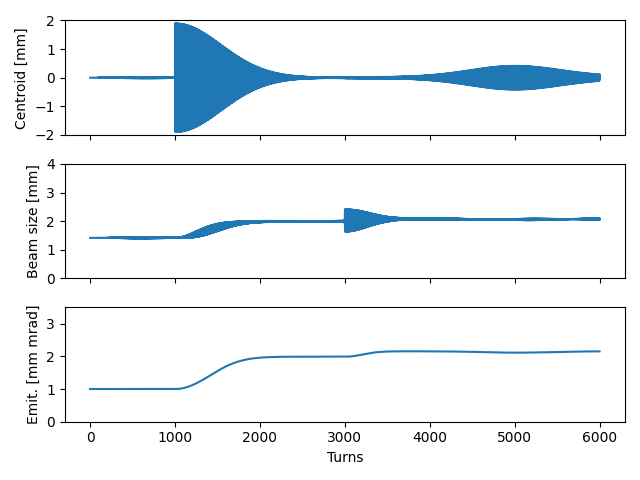

In [7]:

from map2D import map2D
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import animation
#from IPython.display import HTML
%matplotlib widget

chrom_example=map2D(npart=10000, twiss=[2,0], twiss_beam=[2,0],tune=0.3, chrom=3, espr=1e-4)
avex,avep,sizex,sizep,emit=chrom_example.statistics()
emitlist=[]
sizelist=[]
avelist=[]
N_turn=6000

def evolve_func(turns, kick_turn=1000, kick_angle=1.0e-3,
               quad_kick_turn=3000, invf = 0.2
               ):
    for i in range(turns):
        if i==kick_turn:
            chrom_example.coor2D[1,:]+=kick_angle/(1.0+chrom_example.espread)
            
        if i==quad_kick_turn:
            chrom_example.coor2D[1,:]+=invf*chrom_example.coor2D[0,:]
        chrom_example.propagate()
        
        avex,avep,sizex,sizep,emit=chrom_example.statistics()
        avelist.append(avex)
        sizelist.append(sizex)
        emitlist.append(emit)
        yield chrom_example.coor2D
        
evolve=evolve_func(N_turn+2)
    
for i in range(N_turn):
    arr=next(evolve)
    
fig1,(ax1,ax2,ax3)=plt.subplots(3,1, sharex= True)
ax3.set_xlabel("Turns")
ax1.set_ylabel("Centroid [mm]")
ax2.set_ylabel("Beam size [mm]")
ax3.set_ylabel("Emit. [mm mrad]")
ax1.plot(np.array(avelist)*1e3)  
ax1.set_ylim([-2,2])
ax2.plot(np.array(sizelist)*1e3) 
ax2.set_ylim([0,4])
ax3.set_ylim([0,3.5])
ax3.plot(np.array(emitlist)*1e6) 
fig1.tight_layout()




In addition, a large chromaticity with the beam energy spread may induce wide enough tune spread to induce nonlinear resonances.  Also the sign of chromaticity is important in the growth rate of the 'head-tail instability', one type of collective instabilities in accelerator.

## Chromatic Correction

For low-$\beta$ lattice, the natural chromaticity is usually large.  For example, the RHIC has natural chromaticity of -50 units for injection lattice.  The large natural chromaticity $\xi_n$ has three intermediate consequences:
* Large absolute value of $\xi_n$ causes large tune spread and possibly strong nonlinear resonances.  
* Large absolute value of $\xi_n$ causes beam quality degradation in presence of the dipole error.  
* For above-transition particles, a negative chromaticity causes head-tail instability and vice-versa.

Therefore we have to find ways to correct large $\xi_n$


Since the quadrupole loose it focusing strength if the energy deviation of the particle is positive.  Therefore we need a magnet whose focusing strength increases when the energy deviation increases.  Meanwhile, the correction of chromaticity should not change the optics and tune of the existing linear lattice.  

Therefore,we try to examine the effect of a sextrupole on the chromatic correction.  For a sextrupole field we have:

\begin{align}
B_x&=B_2 xy \\
B_y&=\frac{B_2}{2}\left(x^2-y^2\right) 
\end{align}
where $B_2=\frac{\partial^2 B_x}{\partial x^2}$.  If we define the effective sextrupole strength 

$$S(s)=-\frac{B_2}{B\rho}$$
for a particle with betatron oscillation and off-momentum orbit $x(s)=x_\beta(s)+D\delta$, we have 

\begin{align}
\frac{\Delta B_x}{B\rho}&=-S(s)\left(x_\beta +D\delta\right)y=-\left(S\left(s\right)D\delta\right)y - S\left(s\right)x_\beta y\\
\frac{\Delta B_y}{B\rho}&=-S(s)\left(\left(x_\beta +D\delta\right)^2-y^2\right)=-\left(S\left(s\right)D\delta\right)x_\beta - \frac{S\left(s\right)}{2}\left(x_\beta^2-y^2\right)-\frac{S\left(s\right)}{2} D^2\delta^2
\end{align}
And we do achieve a 'energy dependent focusing term', $K_{S,x}$ and $K_{S,y}$, which can be used to correct chromaticity:
\begin{align}
K_{S,x}&=S(s)D\delta \\
K_{S,y}&=-S(s)D\delta
\end{align}


Therefore the chromaticity is then contributed from the quadrupoles and the sextrupole in dispersive region:

\begin{align}
\xi_x&=-\frac{1}{4\pi}\oint\beta_x\left( K_x\left(s\right)-S\left(s\right)D\left(s\right)\right)ds\\
\xi_y&=-\frac{1}{4\pi}\oint\beta_y\left( K_y\left(s\right) +S\left(s\right)D\left(s\right)\right)ds
\end{align}

It is easy to learn that to correct chromaticity in both directions, we need two independent families of sextrupoles located near the quadrupoles, where the dispersion and beta functions reaches its maximum.